# Iterační metody řešení soustav lineárních rovnic, hledání vlastních čísel

Naimportujeme si knihovny potřebné pro následující příklady:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Iterační metody:
1. Řešení rovnice $\mathbb{A}\mathbf{x}=\mathbf{b}$ odhadneme vektorem $\mathbf{x}^{0}$
2. Následné iterace $\mathbf{x}^{(k+1)}=\mathbb{B}_{k}\mathbf{x}^{(k)}+\mathbf{c}_{k}$ upřesňují náš počáteční odhad

### Jacobiho metoda

* Řešíme rovnici $\mathbb{A}\mathbf{x}=\mathbf{b}$
* Předpokládáme, že matice $\mathbb{A}$ má nenulové diagonální prvky $a_{ii}\neq 0$
* Matici $\mathbb{A}$ lze zapsat ve tvaru:

$$
\mathbb{A}=\mathbb{D}+\mathbb{L}+\mathbb{U}
$$


kde $\mathbb{D}$ je diagonální, $\mathbb{L}$ je dolní trojúhelníková a $\mathbb{U}$ je horní trojúhelníková matice ($\mathbb{L}$ a $\mathbb{U}$ mají nulovou diagonálu)
* Jacobiho metoda ([odvození](http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/02_linalg/DOCS/teorie_iteracni_metody.pdf)):
$$
\mathbf{x}^{(k+1)} = -\mathbb{D}^{-1}\left( \mathbb{L}+\mathbb{U}\right)\mathbf{x}^{(k)}+ \mathbb{D}^{-1}\mathbf{b}
$$
 * Metoda konverguje, pokud je matice $\mathbb{A}$ diagonálně dominantní, tj. $\vert a_{ii}\rvert > \sum_{j=1,j\neq i}^{n}\vert a_{ij} \rvert$

<div class="alert alert-block alert-warning"><b>Cvičení 04.01: </b> Doplňte předpis pro Jacobiho metodu.</div>

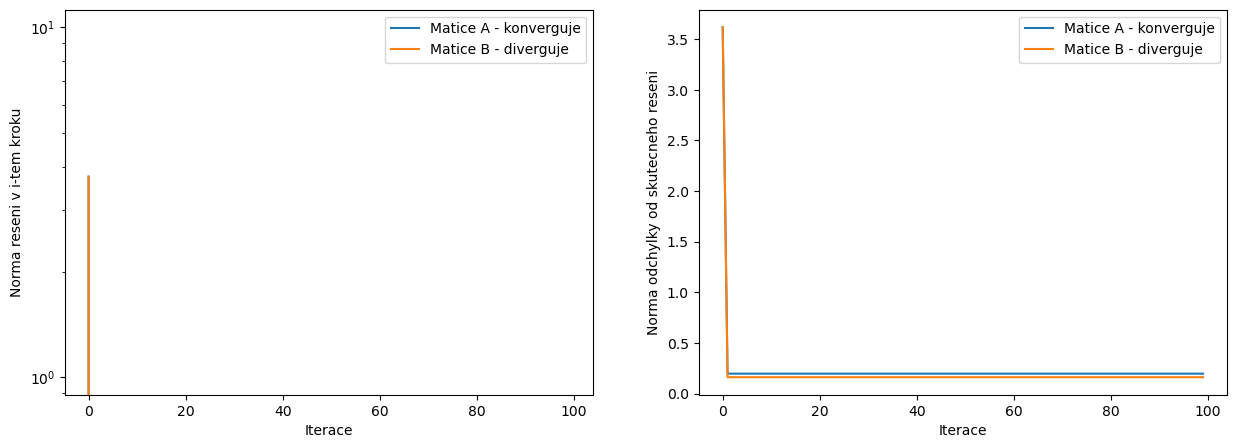

In [2]:
#
# Jacobiho metoda
# Zvolme dve matice, A bude konvergovat, B nebude konvergovat
# matice A je diagonalne dominantni
A = np.array([
    [5, 1, 1],
    [2, 7, 3],
    [2, 3, 8]             
])

# matice B neni diagonalne dominantni
B = np.array([
    [5, 10, 1],
    [2, 7, 3],
    [2, 3, 8]
])

# zvolime pravou stranu (radkovy vektor prevedeme na sloupcovy pomoci transpozice .T)
b = np.array([[1, 1, 1]]).T

# nastavime uvodni odhad reseni (radkovy vektor prevedeme na sloupcovy pomoci transpozice .T)
xUvodni = np.array([[1, 2, 3]]).T

# zvolime pocet iteraci, po ktere budeme chtit sledovat jak se reseni chova
pocet_iteraci = 100

# spocteme si reseni matic Ax=b a Bx=b primou metodou, pro kontrolu postupu
reseniA = np.linalg.solve(A, b)
reseniB = np.linalg.solve(B, b)

# v prubehu iteraci si budeme pamatovat velikost vektoru reseni v i-tem kroku, 
# dale "vzdalenost" reseni v i-tem kroku od skutecneho reseni spocitaneho primou metodou

# budeme iterovat matici A
x = xUvodni
L = np.tril(A,-1) # vytvori dolni trojuhlenikovou matici (s nulovou diagonalou)
U = np.triu(A,1) # vytvori horni trojuhlenikovou matici (s nulovou diagonalou)
D = A - L - U
velikostReseniA = np.array([])
velikostChybyA = np.array([])
for i in range(pocet_iteraci):
    velikostReseniA = np.append(velikostReseniA, np.linalg.norm(x))  # jen pro zobrazovani
    velikostChybyA = np.append(velikostChybyA,np.linalg.norm(x-reseniA)) # jen pro zobrazovani
    # DOPLNTE #    
    x = 0
    # DOPLNTE #


# budeme iterovat matici B
x = xUvodni
L = np.tril(B,-1)  # vytvori dolni trojuhlenikovou matici (s nulovou diagonalou)
U = np.triu(B,1)  # vytvori horni trojuhlenikovou matici (s nulovou diagonalou)
D = B-L-U
velikostReseniB = np.array([])
velikostChybyB = np.array([])
for i in range(pocet_iteraci):
    velikostReseniB = np.append(velikostReseniB, np.linalg.norm(x))  # jen pro zobrazovani
    velikostChybyB = np.append(velikostChybyB,np.linalg.norm(x-reseniB)) # jen pro zobrazovani
    # DOPLNTE #
    x = 0
    # DOPLNTE #
    
# zobrazime si, jak to vypada
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(range(pocet_iteraci),velikostReseniA,label='Matice A - konverguje')
ax[0].plot(range(pocet_iteraci),velikostReseniB,label='Matice B - diverguje')
ax[0].set_yscale('log')
ax[0].set_ylabel('Norma reseni v i-tem kroku')
ax[0].set_xlabel('Iterace')
ax[0].legend()

ax[1].plot(range(pocet_iteraci),velikostChybyA,label='Matice A - konverguje')
ax[1].plot(range(pocet_iteraci),velikostChybyB,label='Matice B - diverguje')
ax[1].set_yscale('linear')
ax[1].set_ylabel('Norma odchylky od skutecneho reseni')
ax[1].set_xlabel('Iterace')
ax[1].legend()

###  Gauss-Seidelova metoda

* **Gauss-Seidelova metoda:**
$$
\mathbf{x}^{(k+1)} = -\left(\mathbb{D}+\mathbb{L} \right)^{-1}\mathbb{U}\mathbf{x}^{(k)}+\left(\mathbb{D}+\mathbb{L} \right)^{-1}\mathbf{b}
$$
* Při výpočtu složek vektoru $\mathbf{x}_{i}^{(k+1)}$ používá již dříve vypočtené složky $(k+1).$ iterace
* Metoda konverguje, pokud je matice $\mathbb{A}$ diagonálně dominantní nebo symetrická pozitivně definitní (pozitivně definitní matice má vždy kladná vlastní čísla)

<div class="alert alert-block alert-warning"><b>Cvičení 04.02: </b> Doplňte předpis pro Gauss-Seidelovu metodu.</div>

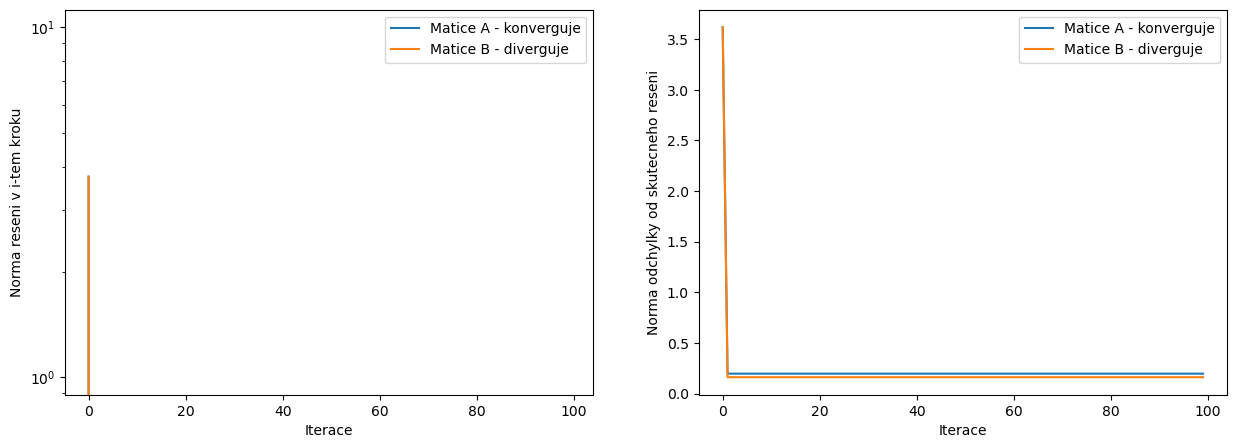

In [3]:
#
# Gauss-Seidelova metoda
# Zvolme dve matice, A bude konvergovat, B nebude konvergovat
# matice A je diagonalne dominantni
A = np.array([
    [5, 1, 1],
    [2, 7, 3],
    [2, 3, 8]             
])

# matice B neni diagonalne dominantni
B = np.array([
    [5, 10, 1],
    [2, 7, 3],
    [2, 3, 8]
])

# zvolime pravou stranu (radkovy vektor prevedeme na sloupcovy pomoci transpozice .T)
b = np.array([[1, 1, 1]]).T

# nastavime uvodni odhad reseni (radkovy vektor prevedeme na sloupcovy pomoci transpozice .T)
xUvodni = np.array([[1, 2, 3]]).T

# zvolime pocet iteraci, po ktere budeme chtit sledovat jak se reseni chova
pocet_iteraci = 100

# spocteme si reseni matic Ax=b a Bx=b primou metodou, pro kontrolu postupu
reseniA = np.linalg.solve(A, b)
reseniB = np.linalg.solve(B, b)

# v prubehu iteraci si budeme pamatovat velikost vektoru reseni v i-tem kroku, 
# dale "vzdalenost" reseni v i-tem kroku od skutecneho reseni spocitaneho primou metodou

# budeme iterovat matici A
x = xUvodni
L = np.tril(A,-1) # vytvori dolni trojuhlenikovou matici (s nulovou diagonalou)
U = np.triu(A,1) # vytvori horni trojuhlenikovou matici (s nulovou diagonalou)
D = A - L - U
velikostReseniA = np.array([])
velikostChybyA = np.array([])
for i in range(pocet_iteraci):
    velikostReseniA = np.append(velikostReseniA, np.linalg.norm(x))  # jen pro zobrazovani
    velikostChybyA = np.append(velikostChybyA,np.linalg.norm(x-reseniA)) # jen pro zobrazovani
    # DOPLNTE
    x = 0
    # DOPLNTE



# budeme iterovat matici B
x = xUvodni
L = np.tril(B,-1)  # vytvori dolni trojuhlenikovou matici (s nulovou diagonalou)
U = np.triu(B,1)  # vytvori horni trojuhlenikovou matici (s nulovou diagonalou)
D = B-L-U
velikostReseniB = np.array([])
velikostChybyB = np.array([])
for i in range(pocet_iteraci):
    velikostReseniB = np.append(velikostReseniB, np.linalg.norm(x))  # jen pro zobrazovani
    velikostChybyB = np.append(velikostChybyB,np.linalg.norm(x-reseniB)) # jen pro zobrazovani
    # DOPLNTE
    x = 0
    # DOPLNTE

# zobrazime si, jak to vypada
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(range(pocet_iteraci),velikostReseniA,label='Matice A - konverguje')
ax[0].plot(range(pocet_iteraci),velikostReseniB,label='Matice B - diverguje')
ax[0].set_yscale('log')
ax[0].set_ylabel('Norma reseni v i-tem kroku')
ax[0].set_xlabel('Iterace')
ax[0].legend()

ax[1].plot(range(pocet_iteraci),velikostChybyA,label='Matice A - konverguje')
ax[1].plot(range(pocet_iteraci),velikostChybyB,label='Matice B - diverguje')
ax[1].set_yscale('linear')
ax[1].set_ylabel('Norma odchylky od skutecneho reseni')
ax[1].set_xlabel('Iterace')
ax[1].legend()

### Superrelaxační metoda

* Gauss-Seidelova metoda může konvergovat pomalu
* K urychlení iteračního procesu bývá využívána **superrelaxační metoda**:
$$
x_{i}^{(k+1)}=x_{i}^{(k)}+\omega\Delta x_{i}^{(k)}
$$
 * rozdíl mezi iteracemi při Gauss-Seidelově metodě $\Delta x_{i}^{(k)}=x_{i}^{(k+1)}-x_{i}^{(k)}$ 
 * relaxační faktor $\omega \in (0,2)$ 
 * optimální hodnota relaxačního faktoru $\omega_{\mathrm{opt}}=\dfrac{2}{1+\sqrt{1-\rho^{2}\left[-\left(\mathbb{D}+\mathbb{L}\right)^{-1}\mathbb{U}\right]}}$
   * $\rho(\mathbb{A})$ představuje [spektrální poloměr](https://cs.wikipedia.org/wiki/Spektrum_matice) matice $\mathbb{A}$: $\rho(\mathbb{A}) = \mathrm{max}(\lvert \lambda_{1} \rvert, \lvert \lambda_{2} \rvert, ..., \lvert \lambda_{n} \rvert)$

### Prostá iterace

* **Prostá iterace**:
$$
\mathbf{x}^{(k+1)}=\left(\mathbb{I}-\mathbb{A} \right)\mathbf{x}^{(k)} + \mathbb{I}\mathbf{b}
$$

### Porovnání prosté iterace, Jacobiho, Gauss-Seidelovy a superrelaxační metody

<div class="alert alert-block alert-warning"><b>Cvičení 04.03: </b> Doplňte předpis pro prostou iteraci a superrelaxační metodu.</div>

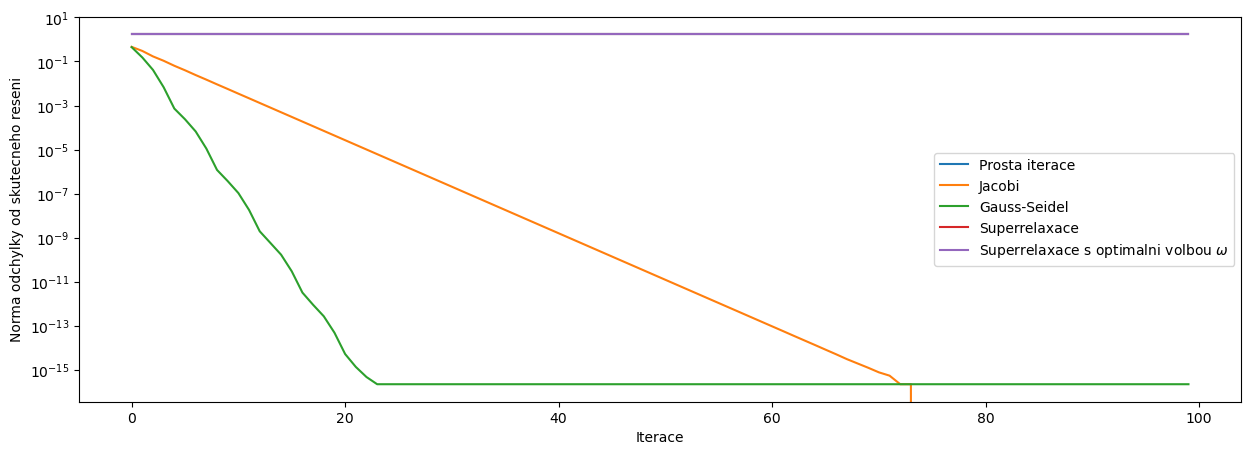

In [4]:
#
# zvolme pocet iteraci
pocet_iteraci = 100

# zvolime nahodnou matici, uvidime jeslti bude konvergovat, ke ktere 
# pricteme jednotkovou diagonalni, zvysime tak pravdepodobnost ze vse bude konvergovat
#A = rand(3)/2+eye(3)/2
A = np.random.rand(3,3)/2+np.eye(3)/2

# zvolime pozadovane reseni, ze ktereho napocitame pravou stranu
origReseni = np.array([[1,1,1]]).T

# najdeme pravou stranu
b = np.dot(A,origReseni)

# zvolime nahodny uvodni odhad ze ktereho budeme iterovat
uvodniOdhad = np.random.rand(3,1)

# zvolime omega pro superrelaxaci, nebude optimalni, nevadi
omega = 1.6

# PROSTA ITERACE
# spocteme si matici B jako I-A
B = np.eye(A.shape[0])-A
x = uvodniOdhad
vzdProstaIterace = np.array([])
for i in range(pocet_iteraci):
    # DOPLNTE
    x = 0
    # DOPLNTE
    vzdProstaIterace = np.append(vzdProstaIterace,np.linalg.norm(x-origReseni))

# JACOBI
L = np.tril(A,-1) # vytvori dolni trojuhlenikovou matici (s nulovou diagonalou)
U = np.triu(A,1) # vytvori horni trojuhlenikovou matici (s nulovou diagonalou)
D = A - L - U
F = -np.dot(np.linalg.inv(D),(L+U))
G = np.linalg.inv(D)
x = uvodniOdhad
vzdJacobi = np.array([])
for i in range(pocet_iteraci):
    x = np.dot(F,x) + np.dot(G,b)                         # toto je vlastni vypocet 
    vzdJacobi = np.append(vzdJacobi,np.linalg.norm(x-origReseni))
    
# GAUSS-SEIDEL
L = np.tril(A,-1) # vytvori dolni trojuhlenikovou matici (s nulovou diagonalou)
U = np.triu(A,1) # vytvori horni trojuhlenikovou matici (s nulovou diagonalou)
D = A - L - U
F = -np.dot(np.linalg.inv(D+L),U)
G = np.linalg.inv(D+L)
x = uvodniOdhad
vzdGaussSeidel = np.array([])
for i in range(pocet_iteraci):
    x = np.dot(F,x) + np.dot(G,b)                         # toto je vlastni vypocet 
    vzdGaussSeidel = np.append(vzdGaussSeidel,np.linalg.norm(x-origReseni))

# SUPERRELAXACE + GAUS-SEIDEL
L = np.tril(A,-1) # vytvori dolni trojuhlenikovou matici (s nulovou diagonalou)
U = np.triu(A,1) # vytvori horni trojuhlenikovou matici (s nulovou diagonalou)
D = A - L - U

# toto je ze seidela
F = -np.dot(np.linalg.inv(D+L),U)
G = np.linalg.inv(D+L)

x = uvodniOdhad
vzdSuperRelaxace = np.array([])
for i in range(pocet_iteraci):
    # DOPLNTE    
    x = 0
    # DOPLNTE
    vzdSuperRelaxace = np.append(vzdSuperRelaxace,np.linalg.norm(x-origReseni))


    
# SUPERRELAXACE s opt. omega
L = np.tril(A,-1) # vytvori dolni trojuhlenikovou matici (s nulovou diagonalou)
U = np.triu(A,1) # vytvori horni trojuhlenikovou matici (s nulovou diagonalou)
D = A - L - U

# toto je ze seidela
F = -np.dot(np.linalg.inv(D+L),U)
G = np.linalg.inv(D+L)

# spektralni polomer matice F (maximum z mnoziny vlastnich cisel matice F)
r = np.max(np.abs(np.linalg.eig(F)[0]))

omega = 2/( 1+np.sqrt(np.abs(1-r**2))) # optimalni omega
x = uvodniOdhad
vzdSuperRelaxaceOmega = np.array([])
for i in range(pocet_iteraci):
    # DOPLNTE
    x = 0
    # DOPLNTE
    vzdSuperRelaxaceOmega = np.append(vzdSuperRelaxaceOmega,np.linalg.norm(x-origReseni))

# ZOBRAZIME
# zobrazime si jak to vypada
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(range(pocet_iteraci),vzdProstaIterace,label='Prosta iterace')
ax.plot(range(pocet_iteraci),vzdJacobi,label='Jacobi')
ax.plot(range(pocet_iteraci),vzdGaussSeidel,label='Gauss-Seidel')
ax.plot(range(pocet_iteraci),vzdSuperRelaxace,label='Superrelaxace')
ax.plot(range(pocet_iteraci),vzdSuperRelaxaceOmega,label=r'Superrelaxace s optimalni volbou $\omega$')
ax.set_yscale('log')
ax.set_ylabel('Norma odchylky od skutecneho reseni')
ax.set_xlabel('Iterace')
ax.legend()
                 


## Hledání vlastních čísel a vektorů matice

* Nechť pro číslo $\lambda$ existuje vektor $\mathbf{x}\neq\mathbf{0} $ takový, že $\mathbb{A}\mathbf{x}=\lambda\mathbf{x}$. Pak:
 * $\lambda$ je vlastní číslo matice $\mathbb{A}$
 * $\mathbf{x}$ je vlastní vektor matice $\mathbb{A}$


* Motivace: vlastní čísla a vlastní vektory souvisí např. s [operátory v kvantové fyzice](https://www.aldebaran.cz/studium/f2/docs/12_kvanta.pdf), [rezonanční frekvencí](https://www.aldebaran.cz/bulletin/2017_23_tac.php), ... atd.


* Typy úloh:
    1. Úplný problém vlastních čísel - hledání všech vlastních čísel matice a případně i příslušných vlastních vektorů
    2. Částečný problém vlastních čísel - hledání jednoho nebo několika vlastních čísel


* Příklad na částečný problém vlastních čísel: hledám vlastní číslo matice $\mathbb{A}$, které je největší v absolutní hodnotě. Postup:
  1. Zvolíme libovolné $\mathbf{v}^{(0)}$ jako počáteční odhad vlastního vektoru
  2. Iterujeme
$$
\lambda^{(k+1)}=\lVert \mathbb{A}\mathbf{v}^{(k)} \rVert
$$
            
$$
\mathbf{v}^{(k+1)}=\dfrac{\mathbb{A}\mathbf{v}^{(k)}}{\Vert \mathbb{A}\mathbf{v}^{(k)} \rVert}
$$


<div class="alert alert-block alert-warning"><b>Cvičení 04.04: </b> Doplňte předpis pro výpočet vlastního vektoru.</div>

Odhad nejvetsiho vlastniho cisla =  0.0
Odhad prislusneho vlastniho vektoru =  0


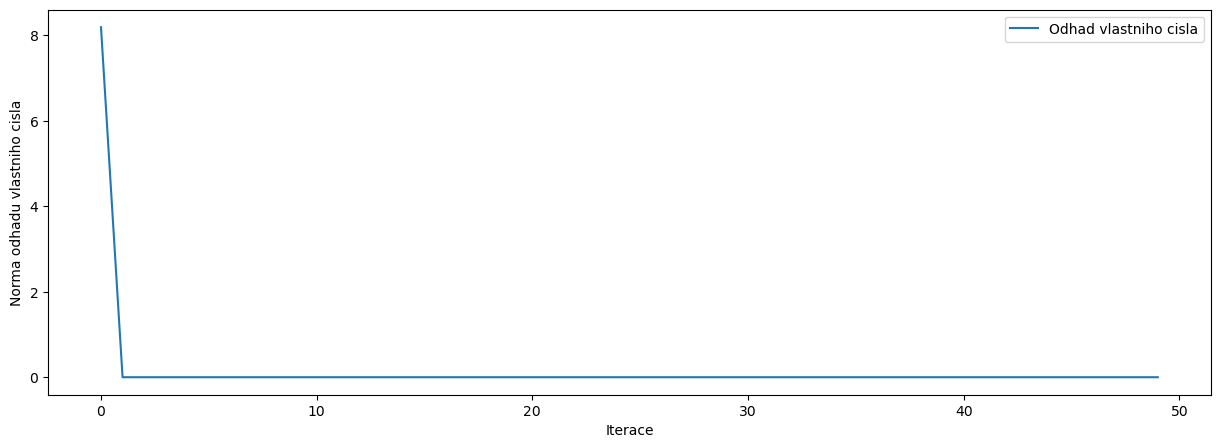

In [5]:
# vypocet nejvetsiho vlastniho cisla

# pouzijeme velmi jednoduchou diagonalni matici 3x3, u ktere zname vlastni cisla, 
# ale muzete si vyzkouset i jine matice

#
#matice = np.array([
#    [4, 0, 0],
#    [0, 3.7, 0],
#    [0, 0, 3]
#])

matice = np.array([
    [4, 0, -10],
    [0, 3.7, -8.8],
    [-7.85, 2.6, 3]
    ])

# do vlastniho vektoru v ulozime uvodni odhad
v = np.array([[1,1,1]]).T

# budeme opakovat 50, v prubehu vypoctu si budeme pamatovat normu matice*v, 
# tedy odhad vlastniho cisla (vime ze se ma blizit ctyrce)

pocet_iteraci = 50
odhadVlastnihoCisla = np.array([])
for i in range(pocet_iteraci):
    odhadVlastnihoCisla = np.append(odhadVlastnihoCisla,np.linalg.norm(np.dot(matice,v)))
    # DOPLNTE
    v = 0
    # DOPLNTE
    

# odhad nejvetsiho vlastniho cisla je
lambda_odhad = np.linalg.norm(np.dot(matice,v))
print('Odhad nejvetsiho vlastniho cisla = ',lambda_odhad)


# odhad vlastniho vektoru je
print('Odhad prislusneho vlastniho vektoru = ',v)

# zobrazime si jak jsme se k vlastnimu cislu blizili

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(range(pocet_iteraci),odhadVlastnihoCisla,label='Odhad vlastniho cisla')
ax.set_ylabel('Norma odhadu vlastniho cisla')
ax.set_xlabel('Iterace')
ax.legend()
 
# kontrola    
#vl_cislo_reseni, vl_vektor_reseni = np.linalg.eig(matice)
#print(np.max(vl_cislo_reseni))
#print(vl_vektor_reseni)